<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_4_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<img src="https://i.stack.imgur.com/P3mN9.png" alt="fit_intercept in sklearn">

In [ ]:
'''
lr_model = LinearRegression()
fit_intercept > false > y=m*x & b=0
normalize=True > depricate
n_jobs=2 > multi-thread

lr_model.fit(X, y) > it is not iterative > it calculates for lin reg with equations
lr_model.predict(X)
lr_model.score(X, y)
lr_model.coef_ #m or w=[,,,]
lr_model.intercept_ #b
'''

'\nlr_model = LinearRegression()\nfit_intercept > false > y=m*x & b=0\nnormalize=True > depricate\nn_jobs=2 > multi-thread\n\nlr_model.fit(X, y) > it is not iterative > it calculates for lin reg with equations\nlr_model.predict(X)\nlr_model.score(X, y)\nlr_model.coef_ #m or w=[,,,]\nlr_model.intercept_ #b\n'

# Data Processing

In [ ]:
x1 = np.random.rand(3)
print(x1.shape)
x2 = np.random.rand(3,1)
print(x2.shape)

# convert to matrix
x3 = x1.reshape(-1,1)
print(x3.shape)
# convert to 1D array
x4 = np.hstack((x3))
print(x1==x4)

print(x1)
print(x2)
print(x3)

(3,)
(3, 1)
(3, 1)
[ True  True  True]
[0.48213926 0.57881693 0.83409528]
[[0.11398454]
 [0.89725652]
 [0.83931508]]
[[0.48213926]
 [0.57881693]
 [0.83409528]]


In [ ]:
# random.normal(loc=0.0, scale=1.0, size=None) > loc=mu / scale=sigma
x = np.random.rand(100) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

print(x.shape, y.shape)

(100,) (100,)


In [ ]:
# ways to create matrix > fit accepts x as matrix but not necessary for y to be matrix > 1.
x = np.random.rand(100,1) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [ ]:
# 2.
x = np.random.rand(100) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

x = x.reshape(-1,1)

print(x.shape, y.shape)

(100, 1) (100,)


# Normalization & Standarization

We want to do scale features between 0 to 1  
<img src="https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-9613d6dab45efff839236cb185a61e49_l3.svg" />

In [ ]:
# another definition
m = x.mean(axis=0)
s = x.std(axis=0)
normalized_x = (x - m) / s
print(normalized_x.min(), normalized_x.max())

-1.7096566300698954 1.9010537986129155


In [ ]:
# lr_model = LinearRegression(normalize=True) > normalize is depricated > we have to normalize ourselves

'''
Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range.
Data normalization is used in machine learning to make model training less sensitive to the scale of features.
This allows our model to converge to better weights and, in turn, leads to a more accurate model.
'''

'''
axis represents the dimension in numpy. 
For 2-d data, axis=0 means 1st dimension (that is row wise) which is appropriate for scale, 
because you want to scale the values of different samples for same feature. 
axis=1 means column wise that is scale each sample indepently. 
sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)
if 1, independently normalize each sample, otherwise (if 0) normalize each feature. > 0 is more rational
'''

# 1.
print(x[:3,:])

from sklearn import preprocessing

# default axis=1 > means each col > we have one col > return 1 for all values
# fro scaling we need to consider all of the samples of the same features > rows > 0
normalized_x = preprocessing.normalize(x,axis=0)
print(normalized_x.min(), normalized_x.max())

[[8.60240452]
 [4.50284565]
 [9.86229201]]
0.00047163458144710923 0.18202935524520167


In [ ]:
# 2.
from sklearn.preprocessing import MinMaxScaler

'''
for nomalization we uae minMax scaler
we fit a scaler on the test data, then transform the whole dataset with it.
By doing this, we completely ignore the test dataset while building the model.

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

x as input must be matrix
'''
min_max_scaler = MinMaxScaler().fit(x)
x_norm = min_max_scaler.transform(x)
print(x_norm[:3,:])
print(x_norm.std(),x_norm.mean())

[[0.4359606 ]
 [0.2269614 ]
 [0.50019079]]
0.276953807222032 0.4734959127402468


In [ ]:
'''
for standarization > we use standard scaler
default: the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0

scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

or 

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
'''
print(x.min(),x.max(),x.mean(),x.std())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
print(x_std.min(),x_std.max(),x_std.mean(),x_std.std())

0.16738518572297467 19.97466168956467 9.702512659274781 5.57548977849542
-1.7101865221471033 1.8423760850408895 -8.049116928532385e-17 0.9999999999999999


# Fit model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [ ]:
lr_model = LinearRegression()

# optional how to give y > array ot matrix
lr_model.fit(x, y)
print(lr_model.coef_, lr_model.intercept_)

[46.35269258] -2.672254069428419


In [ ]:
lr_model.score(x, y)

0.9546446447127603

In [ ]:
h = lr_model.predict(x)
MSE = np.mean((y - h) ** 2) / 2
print(MSE)

4.044113076269621


In [ ]:
# lr_model.score(x, y)

1 - (2*MSE / y.var())

0.9546446447127603

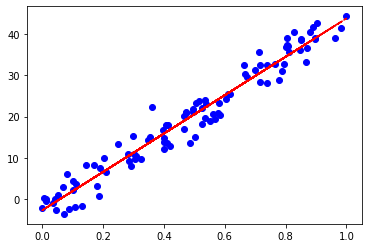

In [ ]:
plt.plot(x,y,'bo')
plt.plot(x,h,'r--')
plt.show()

# Non-Linear Regression

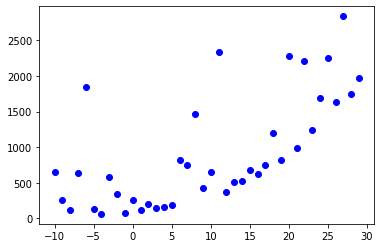

In [ ]:
x = np.arange(-10, 30, 1).reshape(-1, 1)
# create polynomial degrees
x_2 = np.hstack((x,x**2))

y_2 = 2 * x_2[:,0] + 2.15 * x_2[:,1] - 3.121
y_2 = y_2 + np.random.normal(scale=20, size=y_2.shape)**2

plt.plot(x_2[:,0],y_2,'bo')

In [ ]:
# we have two features
lr_model.fit(x_2,y_2)
print( lr_model.coef_ , lr_model.intercept_ )

print(lr_model.score(x_2,y_2))

[5.87196879 2.05103666] 399.4030096864785
0.5588068960738505


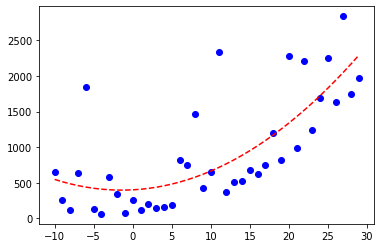

In [ ]:
# we have two features now
h = lr_model.predict(x_2)

plt.plot(x_2[:, 0], y_2, 'bo')
plt.plot(x_2[:, 0], h, 'r--')

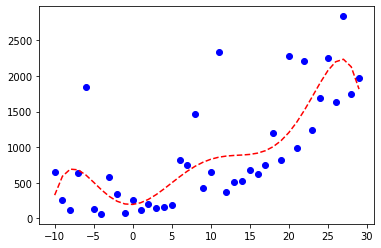

In [ ]:
x = np.arange(-10, 30, 1).reshape(-1, 1)
x_6 = np.hstack((x,x**2,x**3,x**4,x**5,x**6))

# learn y_2 with degree6
lr_model.fit(x_6,y_2)

h = lr_model.predict(x_6)

plt.plot(x_6[:, 0], y_2, 'bo')
plt.plot(x_6[:, 0], h, 'r--')